In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "./archive/epi_r.csv"
data=pd.read_csv(file_name)
data = data.dropna()

## Dataset Preprocessing

In [191]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15864.000000,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,...,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000
mean,3.760952,6.350683e+03,100.324571,3.469868e+02,6.252742e+03,0.000378,0.000063,0.000946,0.001261,0.000441,...,0.001261,0.022504,0.000063,0.000315,0.014183,0.000126,0.000315,0.001324,0.000819,0.021243
std,1.285518,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05,0.019445,0.007940,0.030736,0.035485,0.021002,...,0.035485,0.148320,0.007940,0.017751,0.118249,0.011228,0.017751,0.036360,0.028615,0.144198
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.990000e+02,3.000000,7.000000e+00,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.330000e+02,8.000000,1.700000e+01,2.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.872500e+02,27.000000,3.300000e+01,7.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


According to the above cell, we have food items that have calories in the millions. Let's remove foods with calories higher than 2000. Let us also scale parameters such as a calories, protein, fat, and sodium so they have relatively even weights

In [193]:
data=data[data['calories'] <= 5000]
data=data[data['protein'] <= 1500]
data=data[data['fat'] <= 1500]
data=data[data['sodium'] <= 3000]
#columns_to_scale=['calories','protein','fat','sodium']

"""for column in columns_to_scale:
    data[column] = data[column].astype(float)
    data[column] = (data[column] - data[column].mean()) / data[column].std()"""

'for column in columns_to_scale:\n    data[column] = data[column].astype(float)\n    data[column] = (data[column] - data[column].mean()) / data[column].std()'

In [194]:
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,...,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000,15468.000000
mean,3.758404,459.319822,18.933346,26.367921,475.237587,0.000259,0.000065,0.000905,0.001228,0.000453,...,0.001293,0.022692,0.000065,0.000323,0.014223,0.000129,0.000323,0.001358,0.000840,0.019201
std,1.284667,503.588314,30.518379,37.985519,549.907513,0.016079,0.008040,0.030072,0.035027,0.021269,...,0.035936,0.148925,0.008040,0.017977,0.118413,0.011371,0.017977,0.036822,0.028979,0.137235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,197.000000,3.000000,7.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,325.000000,8.000000,17.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,567.000000,25.000000,32.000000,667.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9831.000000,840.000000,923.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
print(data.describe()['pie'], data['pie'].value_counts())

count    15468.000000
mean         0.001099
std          0.033135
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pie, dtype: float64 pie
0.0    15451
1.0       17
Name: count, dtype: int64


In [196]:
data[data['pie']==1.0].describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.000000,17.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,2.169118,690.294118,8.647059,34.470588,390.823529,0.0,0.0,0.0,0.058824,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.401554,1025.745751,13.052496,47.024086,437.653864,0.0,0.0,0.0,0.242536,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,218.000000,1.000000,4.000000,105.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,249.000000,3.000000,15.000000,184.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,299.000000,4.000000,20.000000,197.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000,515.000000,6.000000,28.000000,334.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.000000,4157.000000,48.000000,200.000000,1634.000000,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression and T Value Optimization

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data.drop(['pie','title'],axis=1), 
                                                    data['pie'], 
                                                    random_state=42)

log_reg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9987070080165503

In [198]:
coef = log_reg.coef_[log_reg.coef_ != 0.0]
coef

array([-5.04794404e-01,  7.73773664e-04, -4.99247887e-02, -3.39272395e-03,
        1.36718144e-05,  1.08027408e+00,  1.28768663e+00, -7.01198656e-01,
        3.17160045e+00, -7.45501824e-01, -3.81135837e-01, -1.46291551e-01,
        1.57502112e+00, -9.02294951e-01, -1.03990573e+00, -2.14943792e+00,
       -2.51034476e-02,  9.57480953e-01,  1.86465393e+00,  7.08665682e-01,
       -4.03571724e-01,  2.67140292e-01,  5.69799982e-02, -8.21266290e-01,
       -1.30104377e+00, -2.43254057e-01])

In [199]:
coef_list = []
t_vals = np.logspace(-5,3,10)
score = []

for t in t_vals:
    log_reg= LogisticRegression(C = t, penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)
    
    score.append(log_reg.score(X_test, y_test))
    coef_list.append(log_reg.coef_[0])

In [200]:
coef_list=np.asarray(coef_list)
coef_list[:,0]

array([ 0.        ,  0.        ,  0.        , -0.34666387, -0.63743613,
       -0.55450264, -0.5255822 , -1.10860775, -1.76860627, -2.19590486])

Text(0, 0.5, 'Coefficients')

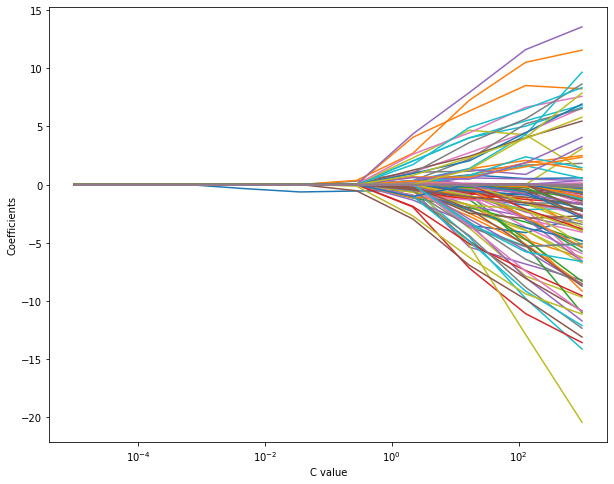

In [201]:
fig = plt.subplots(figsize=(10,8))

for i in range(0,len(coef_list[0])):
    plt.plot(t_vals,coef_list[:,i])
    
plt.xscale('log')

plt.xlabel('C value')
plt.ylabel('Coefficients')

Text(0, 0.5, 'Accuracy')

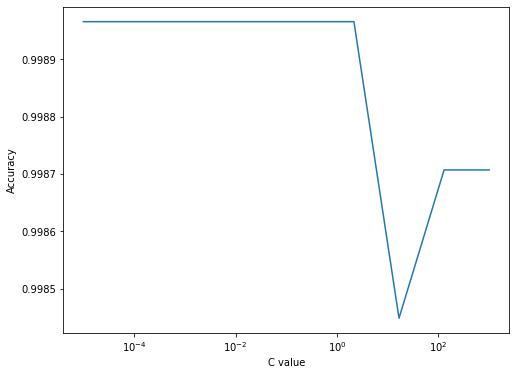

In [202]:
plt.subplots(figsize=(8,6))
plt.plot(t_vals, score)
plt.xscale('log')

plt.xlabel('C value')
plt.ylabel('Accuracy')

Doesn't seem likew standarizing the nutritional features benefits the accuracy of the model. Thus we will omit that step.

## Linear Model

In [206]:
file_name = "./archive/epi_r.csv"
data=pd.read_csv(file_name)
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
#ensure that only items with reasonable nutritional values are included in the list
data=data[data['calories'] <= 2000]
data=data[data['protein'] <= 500]
data=data[data['fat'] <= 500]
data=data[data['sodium'] <= 2000]
data = data.dropna()

#scale rating column to [0,1]
data['rating'] = data['rating']/5

#dividing every column by standard deviation
discarded_columns = []
for column in data.drop(['calories','protein','fat','sodium','title'],axis=1).columns:
    #if column has no std, remove feature from dataset
    if data[column].std() == 0.00:
        discarded_columns.append(column)
    else:
        data[column] = data[column]/data[column].std()
       
#drop inconsequential columns 
data = data.drop(discarded_columns,axis=1)

In [218]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['calories','protein','fat','sodium','title'],axis=1), 
                                                    data[['calories','protein','fat','sodium']],
                                                    random_state=42)

In [214]:
alpha_range = np.logspace(-7,5,10)

for alpha in alpha_range:
    print(f'alpha = {alpha}')
    
    #lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    #print(lasso.score(X_test, y_test))
    
    lin_reg = Ridge(alpha=alpha).fit(X_train, y_train)
    print('score = ', lin_reg.score(X_test, y_test))
    print('')

alpha = 1e-07
score =  0.42775191230830556

alpha = 2.1544346900318822e-06
score =  0.427751912331741

alpha = 4.641588833612772e-05
score =  0.4277519128366364

alpha = 0.001
score =  0.4277519237142674

alpha = 0.021544346900318822
score =  0.427752158061041

alpha = 0.46415888336127725
score =  0.42775720473341183

alpha = 10.0
score =  0.42786493265886205

alpha = 215.44346900318777
score =  0.4297961611068539

alpha = 4641.588833612773
score =  0.4209973270574955

alpha = 100000.0
score =  0.1772617061392358



Seems like the default alpha value is sufficient for our purposes

In [215]:
lin_reg = Ridge(alpha=1).fit(X_train, y_train)
print('score = ', lin_reg.score(X_test, y_test))

score =  0.4277633088125619


We can now predict the nutritional value of foods that had NaN values.

In [184]:
file_name = "./archive/epi_r.csv"
data=pd.read_csv(file_name)
data_nan = data[pd.isna(data['calories'])==True]

data_nan['rating'] = data_nan['rating']/5
data_nan = data_nan.drop(discarded_columns,axis=1)

for column in data_nan.drop(['calories','protein','fat','sodium','title'],axis=1).columns:
    data_nan[column] = data_nan[column]/data_nan[column].std()
    
data_nan.fillna(0,inplace=True)

<ipython-input-184-10a6475aa44f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nan['rating'] = data_nan['rating']/5


In [185]:
predicted_vals = lin_reg.predict(data_nan.drop(['calories','protein','fat','sodium','title'],axis=1))

In [186]:
data_nan['calories'] = predicted_vals[:,0]
data_nan['protein'] = predicted_vals[:,1]
data_nan['fat'] = predicted_vals[:,2]
data_nan['sodium'] = predicted_vals[:,3]

In [217]:
data_nan[data_nan['pie']==0]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3,Mahi-Mahi in Tomato Olive Sauce,3.347832,463.346308,28.314836,24.451688,549.422935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,2.929353,304.457155,16.377845,13.320586,626.611202,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,2.510874,124.453991,4.317918,3.403168,43.192547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Spicy Noodle Soup,2.929353,484.896749,36.281591,27.536417,1056.671556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,"""Fried"" Chicken",2.510874,567.283704,37.901883,33.717545,600.077393,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20012,Pepperoni Spaghetti Cakes,2.510874,600.369434,23.769833,28.503666,725.411576,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20016,Autumn Pear Chip,2.092395,528.114655,12.193764,24.404987,263.924725,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20026,Spinach with Chickpeas and Fried Eggs,3.347832,391.864467,16.502292,26.683873,524.463304,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20035,Herbed Goat Cheese and Roasted-Vegetable Sandw...,2.510874,644.821598,30.691582,40.268648,751.592518,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
columns = data_nan.drop(['calories','protein','fat','sodium','title'],axis=1).columns

print('Top 3 Coefficients for calories:')
coef_vals = lin_reg.coef_[0,:]
sorted_coef_vals = np.sort(coef_vals)[::-1]
for i in range(0,3):
    position = np.where(coef_vals==sorted_coef_vals[i])
    print(f'{columns[position[0][0]]} with coefficient value = {sorted_coef_vals[i]}')
    
print('\nTop 3 Coefficients for protein:')
coef_vals = lin_reg.coef_[1,:]
sorted_coef_vals = np.sort(coef_vals)[::-1]
for i in range(0,3):
    position = np.where(coef_vals==sorted_coef_vals[i])
    print(f'{columns[position[0][0]]} with coefficient value = {sorted_coef_vals[i]}')
        
print('\nTop 3 Coefficients for fat:')
coef_vals = lin_reg.coef_[2,:]
sorted_coef_vals = np.sort(coef_vals)[::-1]
for i in range(0,3):
    position = np.where(coef_vals==sorted_coef_vals[i])
    print(f'{columns[position[0][0]]} with coefficient value = {sorted_coef_vals[i]}')
    
    
print('\nTop 3 Coefficients for sodium:')
coef_vals = lin_reg.coef_[3,:]
sorted_coef_vals = np.sort(coef_vals)[::-1]
for i in range(0,3):
    position = np.where(coef_vals==sorted_coef_vals[i])
    print(f'{columns[position[0][0]]} with coefficient value = {sorted_coef_vals[i]}')


Top 3 Coefficients for calories:
chicken with coefficient value = 60.47134176110046
lamb with coefficient value = 54.4599932123256
roast with coefficient value = 35.101459708747086

Top 3 Coefficients for protein:
chicken with coefficient value = 6.576155689413183
turkey with coefficient value = 4.864627594089579
roast with coefficient value = 3.5088953782487806

Top 3 Coefficients for fat:
lamb with coefficient value = 4.733120473804935
chicken with coefficient value = 4.092068556221383
beef rib with coefficient value = 3.359778316932386

Top 3 Coefficients for sodium:
peanut free with coefficient value = 55.12950884033674
shrimp with coefficient value = 45.94956445944255
prosciutto with coefficient value = 40.55668396688582


## PCA

In [125]:
file_name = "./archive/epi_r.csv"
data=pd.read_csv(file_name)
data = data.dropna()

#ensure that only items with reasonable nutritional values are included in the list
data=data[data['calories'] <= 10000]
data=data[data['protein'] <= 1500]
data=data[data['fat'] <= 1500]
data=data[data['sodium'] <= 3000]

#exclude data with no nutritional values and drop title column which contains string data
data=data[data['calories'] != 0]
data=data.drop(['title'],axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardized_data = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)

principle_components = pca.fit_transform(standardized_data)
principle_components_df = pd.DataFrame(data = principle_components,
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principle_components_df, data[['pie']]], axis = 1)
finalDf = finalDf.fillna(0)

print(pca.explained_variance_ratio_)

[0.01110747 0.00916894]


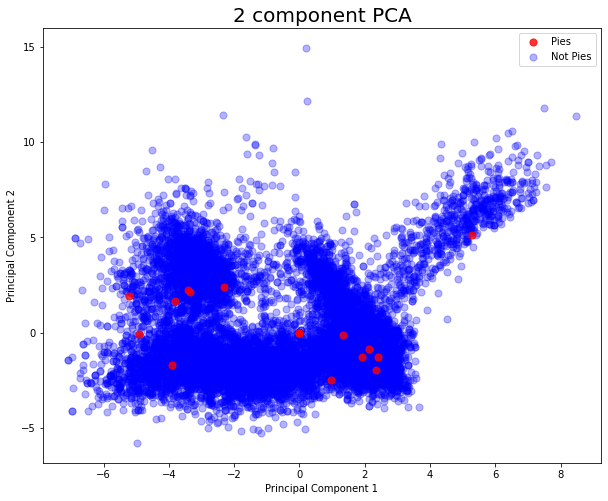

In [225]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 

#ax.scatter(principle_components_df['principal component 1'],principle_components_df['principal component 2'])
targets = [1, 0]
colors = ['r', 'b']

indicesToKeep = finalDf['pie'] == 1
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = 'r'
            , s = 50
            , alpha=0.8
            , zorder = 2
            , label='Pies')

indicesToKeep = finalDf['pie'] == 0
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = 'b'
            , s = 50
            , alpha=0.3
            , zorder = 1
            , label='Not Pies')


ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.legend()
plt.show()


In [143]:
pca = PCA(n_components=300)
principle_components = pca.fit_transform(standardized_data)
sum_vals = []

evr=pca.explained_variance_ratio_
for i in range(0,len(evr)):
    sum = np.sum(evr[0:i])
    sum_vals.append(sum)
    if sum >= 0.6:
        print(f'{i}ith component explains ~{sum}% of the variance')

291ith component explains ~0.6008821802686423% of the variance
292ith component explains ~0.602234130392828% of the variance
293ith component explains ~0.6035809073700054% of the variance
294ith component explains ~0.604926375110725% of the variance
295ith component explains ~0.6062653937766258% of the variance
296ith component explains ~0.6076017982765813% of the variance
297ith component explains ~0.6089372852409247% of the variance
298ith component explains ~0.6102674284866312% of the variance
299ith component explains ~0.6115929807309517% of the variance


Text(0, 0.5, 'Fraction of Variance Explained')

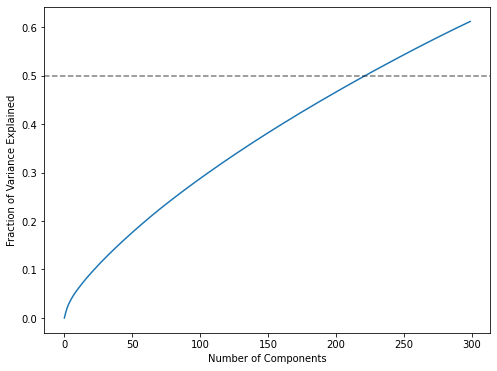

In [222]:
ivals = np.arange(0,len(sum_vals))

plt.subplots(figsize=(8,6))
plt.plot(ivals,sum_vals)
plt.axhline(y=0.5,color='k',linestyle='--',alpha=0.5)

plt.xlabel('Number of Components')
plt.ylabel('Fraction of Variance Explained')